<table style="border:2px solid white;" cellspacing="0" cellpadding="0" border-collapse: collapse; border-spacing: 0;>
  <tr> 
    <th style="background-color:white"> <img src="../media/CCAL.png" width=225 height=225></th>
    <th style="background-color:white"> <img src="../media/logoMoores.jpg" width=175 height=175></th>
    <th style="background-color:white"> <img src="../media/GP.png" width=200 height=200></th>
    <th style="background-color:white"> <img src="../media/UCSD_School_of_Medicine_logo.png" width=175 height=175></th> 
    <th style="background-color:white"> <img src="../media/Broad.png" width=130 height=130></th> 
  </tr>
</table>

<hr style="border: none; border-bottom: 3px solid #88BBEE;">

# **Onco-*GPS* Methodology**
## **Chapter 6. Displaying Genomic Features in the KRAS mut Onco-*GPS* Map** 

**Authors:** Huwate (Kwat) Yeerna -  *Computational Cancer Analysis Laboratory (CCAL), UCSD Moores Cancer Center*  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
 William Kim - Cancer Program, *Eli and Edythe Broad Institute*      
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
Taylor Cavazos - *Computational Cancer Analysis Laboratory (CCAL), UCSD Moores Cancer Center*   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
Kate Medetgul-Ernar - *Computational Cancer Analysis Laboratory (CCAL), UCSD Moores Cancer Center*   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
Clarence Mah - *Mesirov Lab, UCSD School of Medicine and Moores Cancer Center*      
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
Jill P. Mesirov - *Mesirov Lab, UCSD School of Medicine and Moores Cancer Center*  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
Pablo Tamayo - *Computational Cancer Analysis Laboratory (CCAL), UCSD Moores Cancer Center* 

**Date:** Jan 5, 2017

**Article:** [*Kim et al.* Decomposing Oncogenic Transcriptional Signatures to Generate Maps of Divergent Cellular States](https://drive.google.com/file/d/0B0MQqMWLrsA4b2RUTTAzNjFmVkk/view?usp=sharing)

**Analysis overview**

One powerful feature of the Onco-GPS map is that once a group of samples have been projected onto it, they can be color-coded to represent specific sample, molecular features or phenotypes of interest. This allows a direct visual assessment of how each sample associates with specific features or biological phenotypes of interest, as well as e.g. enable tracking of dynamic changes in the cell state of individual samples. We can also use the Onco-GPS to support high-level probabilistic inferential models or networks to predict functional phenotypes such as sensitivity to genetic and pharmacological perturbations. In this notebook we will use the Onco-GPS to visualize the association of selected pathway, protein and gene expression vis a vis the S1-S4 oncogenic states


Go to the [next chapter (7)](7 Onco-GPS -- Defining Global Cellular States and Onco-GPS Map.ipynb).
Back to the [introduction (0)](0 Onco-GPS -- Introduction and Overview.ipynb).

<hr style="border: none; border-bottom: 3px solid #88BBEE;">
### 1. Set up notebook and import Computational Cancer Analysis Library ([CCAL](https://github.com/KwatME/ccal))

In [1]:
import sys
import os
import time
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (8, 5)
mpl.rcParams['figure.max_open_warning'] = 100
HOME_DIR = os.environ['HOME']
sys.path.insert(0, os.path.join(HOME_DIR, 'ccal'))
import ccal
import warnings
warnings.filterwarnings("ignore")

<hr style="border: none; border-bottom: 3px solid #88BBEE;">
### 2. Set parameters, data and result directories
These are the directories where the output and intermediate files will be stored

In [2]:
DATA_DIR = HOME_DIR + '/OncoGPS_Analysis2/data'
RESULTS_DIR = HOME_DIR + '/OncoGPS_Analysis2/results'

MUT_CNA_DATASET = DATA_DIR + '/ccle_mut_cna.gct'
GENE_DEPENDENCY_DATASET = DATA_DIR +  '/ccle_gene_dependency.gct'
GENE_EXPRESSION_DATASET = DATA_DIR + '/rnaseq.v3.NO_HAEM.gct'
PATHWAY_EXPRESSION_DATASET = DATA_DIR + '/ccle_pathway_expression_all.gct'
REGULATOR_DATASET = DATA_DIR + '/ccle_regulator.gct'
PROTEIN_EXPRESSION_DATASET = DATA_DIR + '/ccle_protein_expression.gct'
TISSUE_DATASET = DATA_DIR + '/ccle_tissue.gct'
DRUG_SENSITIVITY_DATASET = DATA_DIR + '/ccle_drug_sensitivity.gct'

<hr style="border: none; border-bottom: 3px solid #88BBEE;">
### 3. Load the Feature Datasets

In [3]:
mut_cna_df = ccal.read_gct(MUT_CNA_DATASET)
gene_dependency_df = ccal.read_gct(GENE_DEPENDENCY_DATASET)
gene_expression_df = ccal.read_gct(GENE_EXPRESSION_DATASET)
pathway_expression_df = ccal.read_gct(PATHWAY_EXPRESSION_DATASET)
regulator_df = ccal.read_gct(REGULATOR_DATASET)
protein_expression_df = ccal.read_gct(PROTEIN_EXPRESSION_DATASET)
tissue_df = ccal.read_gct(TISSUE_DATASET)
drug_sensitivity_df = ccal.read_gct(DRUG_SENSITIVITY_DATASET)

<hr style="border: none; border-bottom: 1px solid #88BBEE;">
### 4 Select state labels and Onco-GPS layout

<hr style="border: none; border-bottom: 1px solid #88BBEE;">
#### 4.1 Read state labels

In [4]:
red, blue, green, purple, black, white = '#4292C6', '#41AB5D', '#EF3B2C', '#807DBA', '#000000', '#FFFFFF'
kras_mutants = mut_cna_df.columns[mut_cna_df.ix['KRAS_MUT', :].astype(bool)]
h_matrix = ccal.read_gct(RESULTS_DIR + '/nmf/matrices/nmf_k9_h.gct')
kras_mutant_h_matrix = h_matrix.ix[:, h_matrix.columns & kras_mutants]
kras_h_matrix = kras_mutant_h_matrix.ix[[7, 2, 1], :]
kras_clusterings = ccal.read_gct(RESULTS_DIR + '/clusterings/clusterings.gct')
kras_sample_labels = kras_clusterings.ix[4, :]

<hr style="border: none; border-bottom: 1px solid #88BBEE;">
#### 4.2 Define components layout

In [5]:
components = pd.DataFrame(index=['Vertex 1', 'Vertex 2', 'Vertex 3'], columns=['x', 'y'])
components.iloc[0, :] = [0.5, np.sqrt(3)/2]
components.iloc[1, :] = [1, 0]
components.iloc[2, :] = [0, 0]

<hr style="border: none; border-bottom: 3px solid #88BBEE;">
### 5. Display selected genomic features in the KRAS mut Onco-GPS map.


<hr style="border: none; border-bottom: 1px solid #88BBEE;">
#### 5.1 Display the enrichment scores for NFkB and ZEB1 targets onto the Onco-GPS map (These are Figs 6B-C in the article).

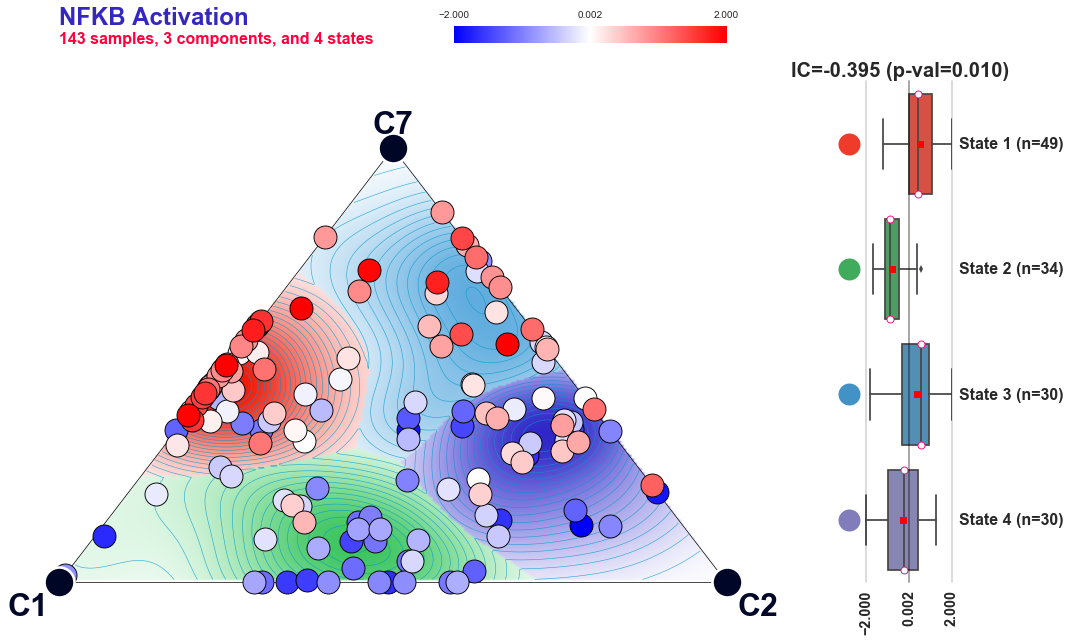

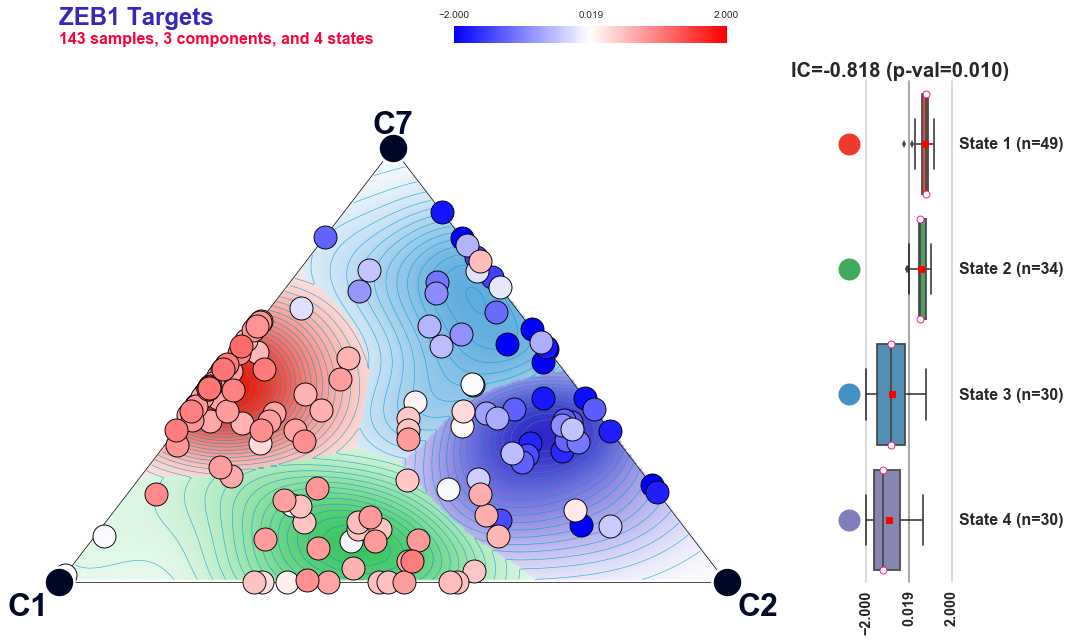

In [6]:
for i, alias in [('HINATA_NFKB_TARGETS_FIBROBLAST_UP', 'NFKB Activation'),
                        ('AIGNER_ZEB1_TARGETS', 'ZEB1 Targets')]:
    
    annotation = pathway_expression_df.ix[i, kras_h_matrix.columns]
    annotation.name = alias
    ccal.oncogps.make_oncogps(training_h = kras_h_matrix, 
                          training_states = kras_sample_labels, 
                          annotation = annotation,
                          title = annotation.name,
                          components = components, 
                          power = 1.3,
                          effectplot_type = 'box',
                          colors=[green, blue, red, purple],
                          component_names = ["C7", "C2", "C1"],
                          std_max = 2,
                          filepath = RESULTS_DIR + 
                              '/KRAS_Onco-GPS_Feature_{}.pdf'.format(annotation.name))

<hr style="border: none; border-bottom: 1px solid #88BBEE;">
#### 5.2. Display selected RTK gene expression features (these are part of Figs S9A-E in the article)

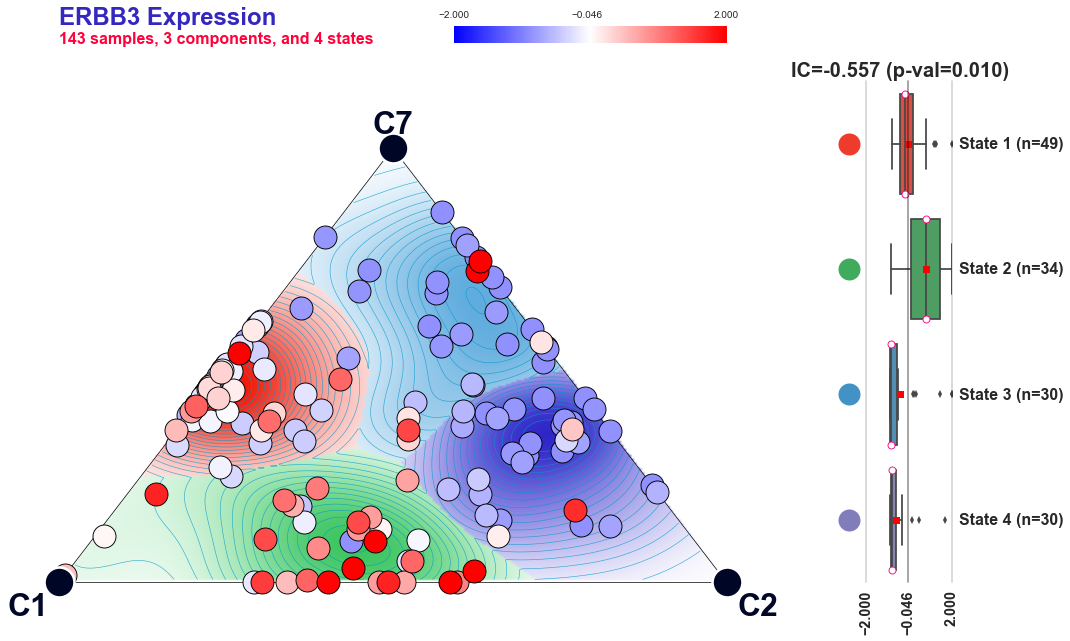

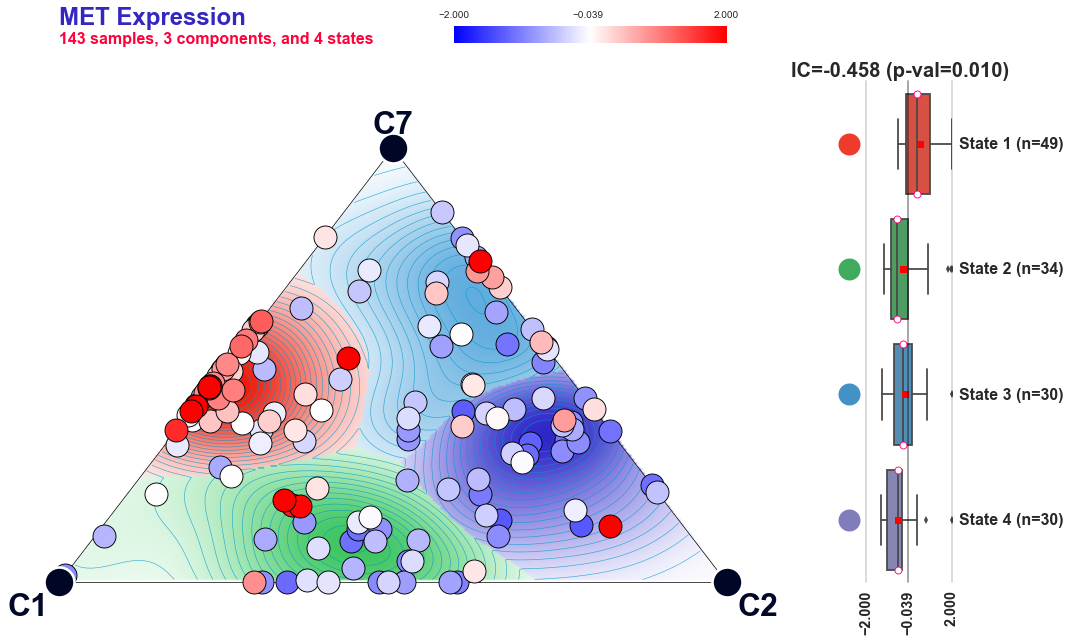

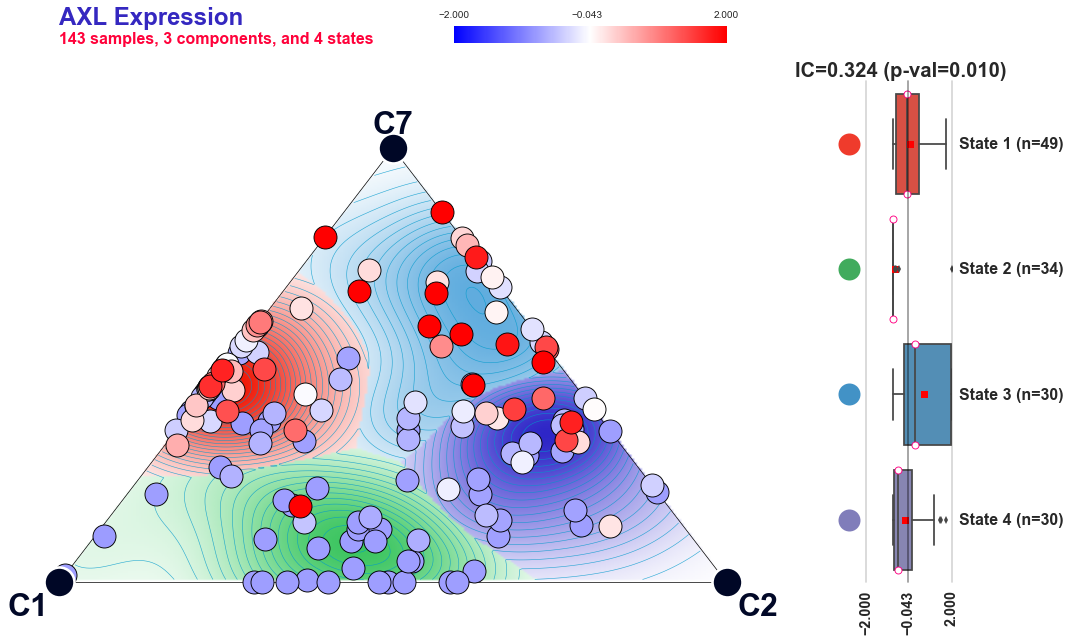

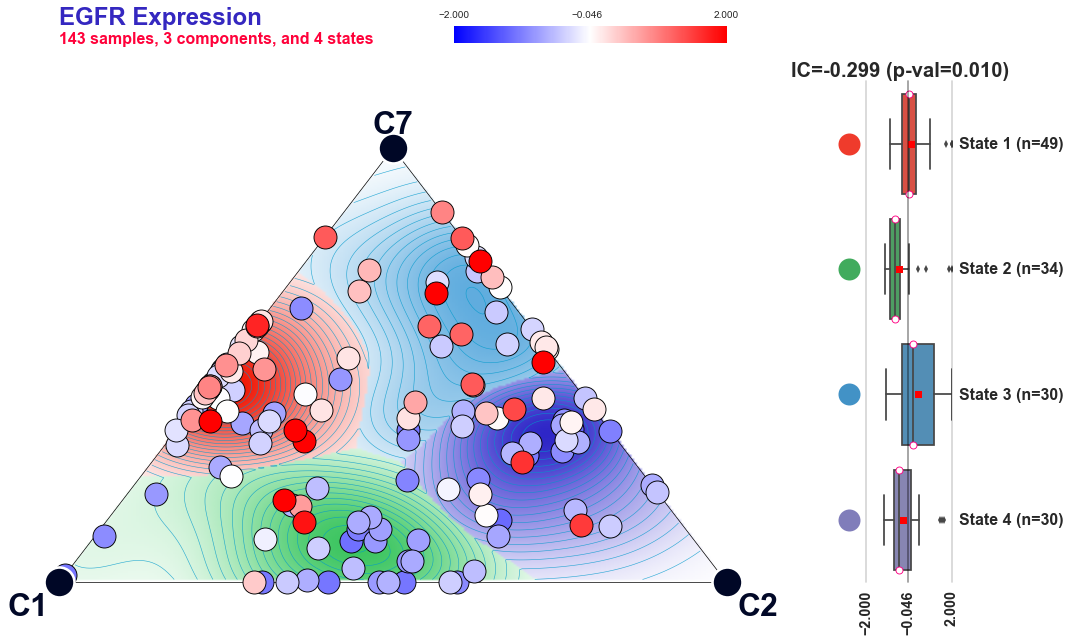

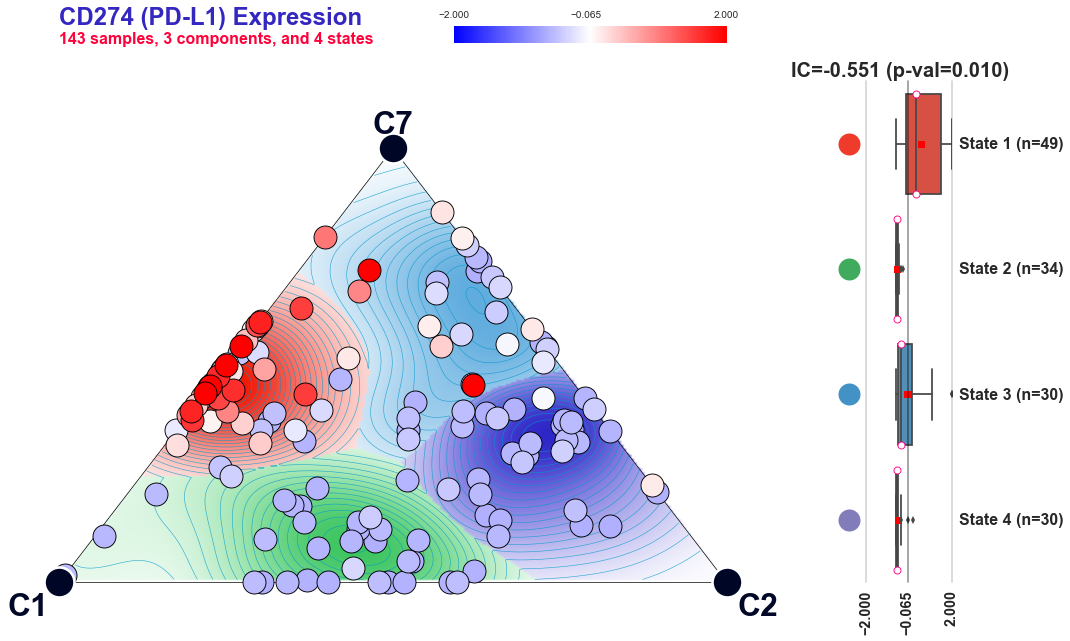

In [7]:
for i, alias in [('ERBB3', 'ERBB3 Expression'),
                        ('MET', 'MET Expression'),
                        ('AXL', 'AXL Expression'),
                        ('EGFR', 'EGFR Expression'),
                        ('CD274', 'CD274 (PD-L1) Expression')]:
    
    annotation = gene_expression_df.ix[i, kras_h_matrix.columns]
    annotation.name = alias
    ccal.oncogps.make_oncogps(training_h = kras_h_matrix, 
                         training_states = kras_sample_labels, 
                          annotation = annotation,
                          title = annotation.name,
                          components = components, 
                          power = 1.3,
                          effectplot_type = 'box',
                          colors=[green, blue, red, purple],
                          component_names = ["C7", "C2", "C1"],
                          std_max = 2,           
                          filepath = RESULTS_DIR + 
                              '/KRAS_Onco-GPS_Feature_{}.pdf'.format(annotation.name))

<hr style="border: none; border-bottom: 1px solid #88BBEE;">
#### 5.3. Display selected protein expression features 

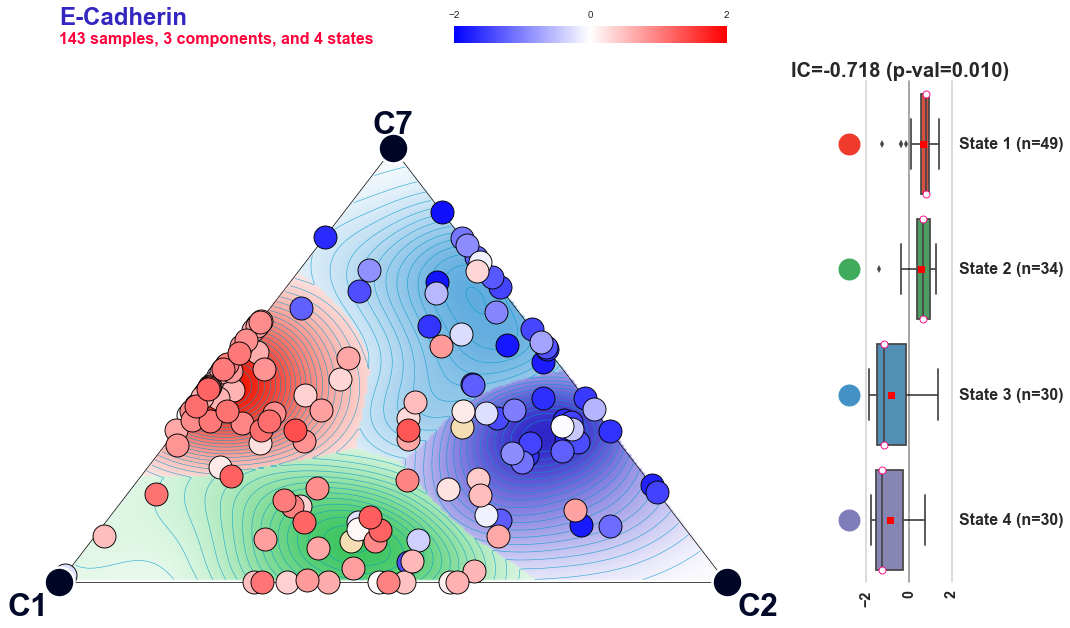

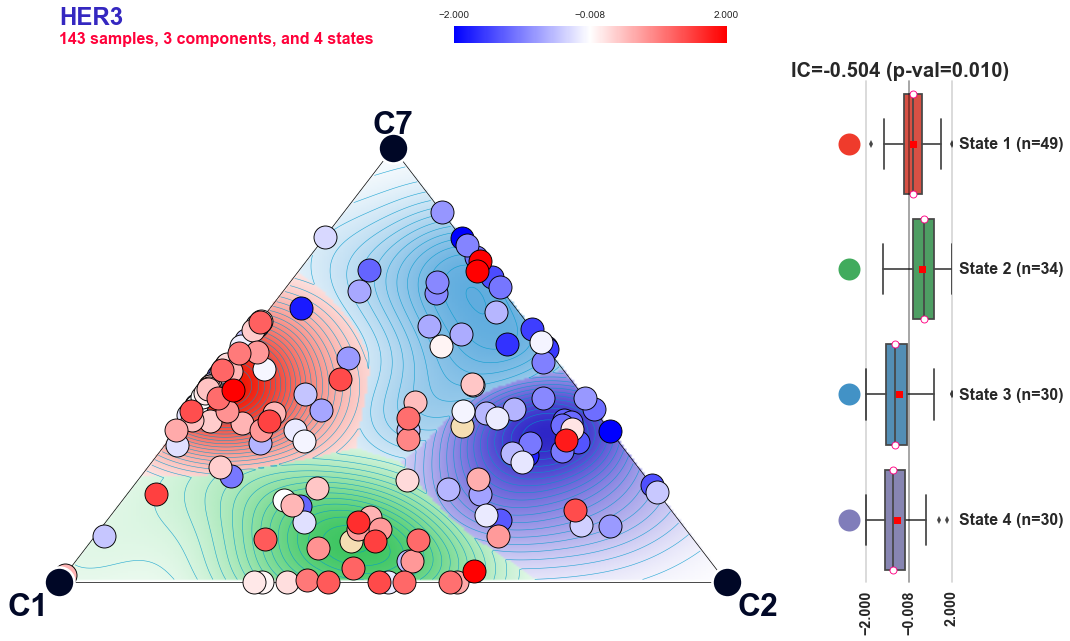

In [8]:
for i, alias in [('E-Cadherin-R-V', 'E-Cadherin'),
                        ('HER3-R-V', 'HER3')]:
    
    annotation = protein_expression_df.ix[i, kras_h_matrix.columns]
    annotation.name = alias
    ccal.oncogps.make_oncogps(training_h = kras_h_matrix, 
                         training_states = kras_sample_labels, 
                          annotation = annotation,
                          title = annotation.name,
                          components = components, 
                          power = 1.3,
                          effectplot_type = 'box',
                          colors=[green, blue, red, purple],
                          component_names = ["C7", "C2", "C1"],
                          std_max = 2,           
                          filepath = RESULTS_DIR + 
                              '/KRAS_Onco-GPS_Feature_{}.pdf'.format(annotation.name))

<hr style="border: none; border-bottom: 1px solid #88BBEE;">
#### 5.4. Display selected tissue types

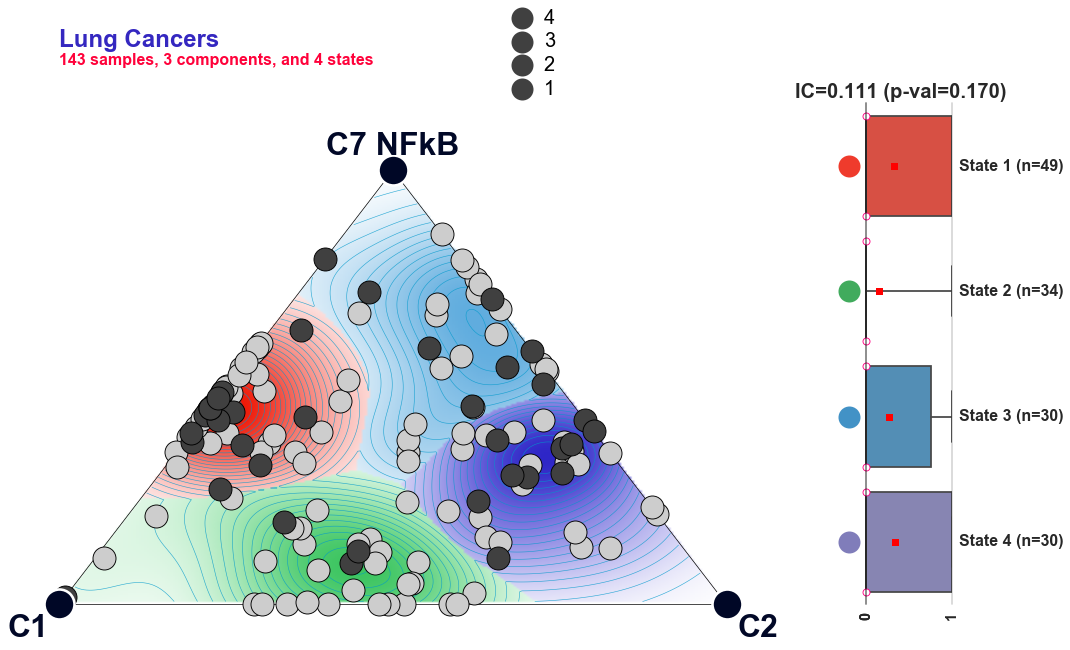

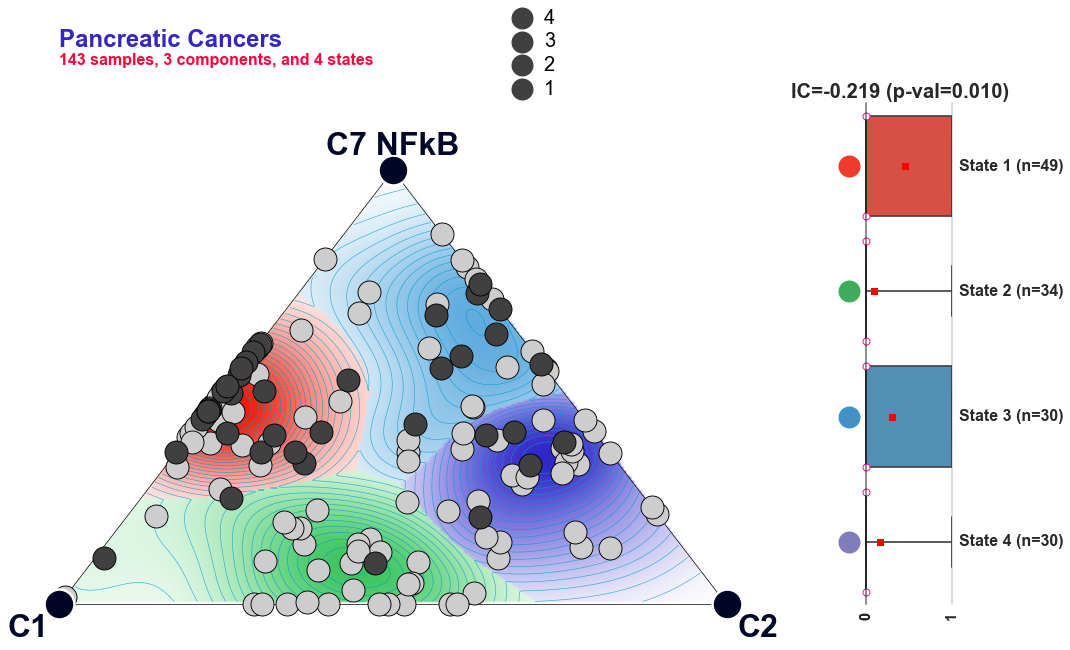

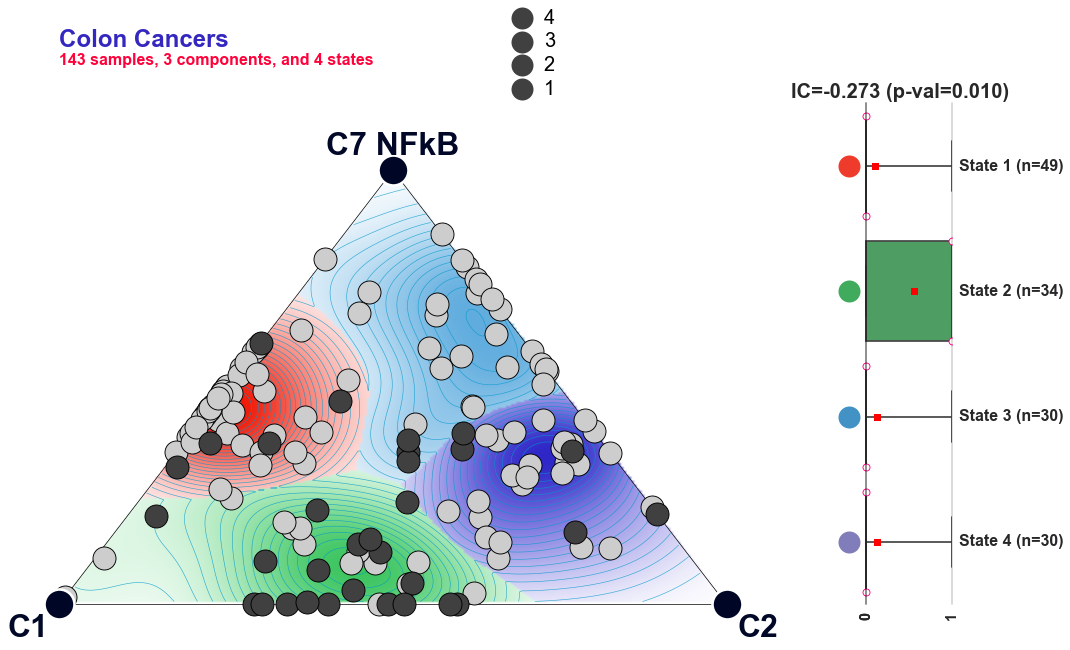

In [9]:
for i, alias in [('lung', 'Lung Cancers'),
                        ('pancreas', 'Pancreatic Cancers'),
                        ('large_intestine', 'Colon Cancers')]:
    
    annotation = tissue_df.ix[i, :]
    annotation.name = alias
     
    annotation = tissue_df.ix[i, kras_h_matrix.columns]
    annotation.name = alias
    ccal.oncogps.make_oncogps(training_h = kras_h_matrix, 
                         training_states = kras_sample_labels, 
                          annotation = annotation,
                          title = annotation.name,
                          annotation_type = 'binary',
                          components = components, 
                          power = 1.3,
                          effectplot_type = 'box',
                          colors=[green, blue, red, purple],
                          component_names = ["C7 NFkB", "C2", "C1"],
                          std_max = 2,           
                          filepath = RESULTS_DIR + 
                              '/KRAS_Onco-GPS_Feature_{}.pdf'.format(annotation.name))

<hr style="border: none; border-bottom: 1px solid #88BBEE;">
#### 5.5. Display mutation status for selected genes

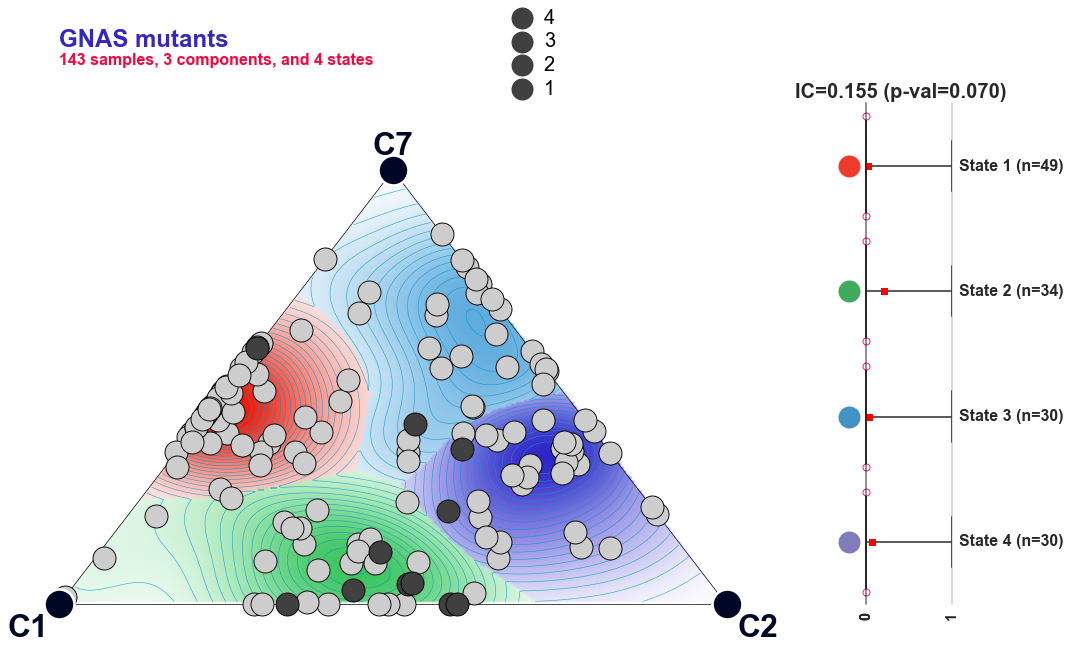

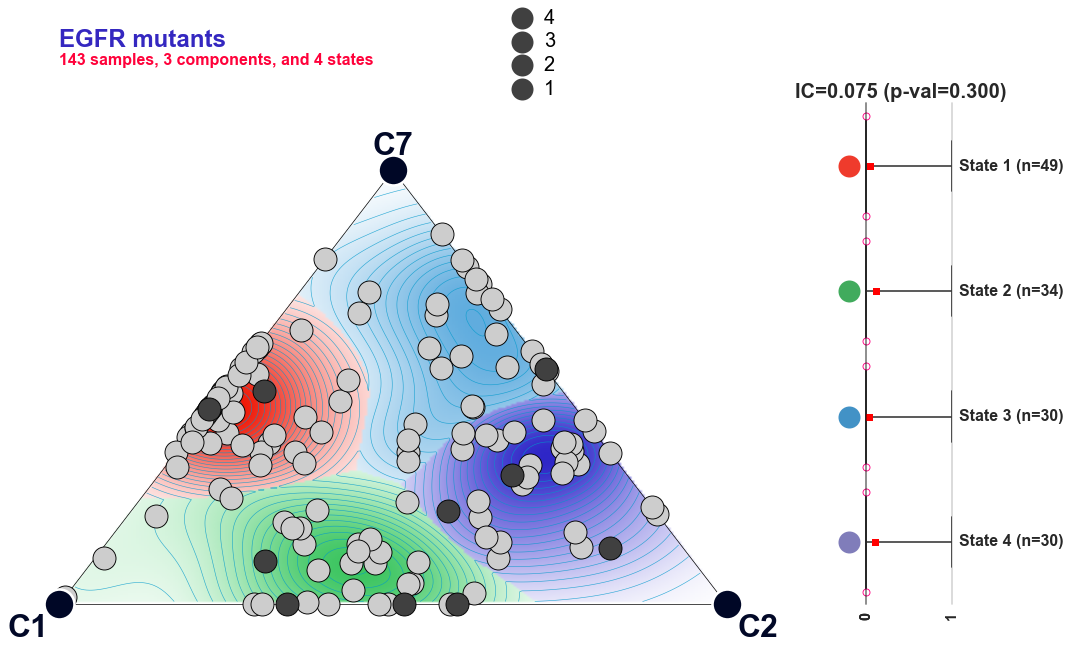

In [10]:
for i, alias in [('GNAS_MUT', 'GNAS mutants'),
                        ('EGFR_MUT', 'EGFR mutants')]:
    
    annotation = mut_cna_df.ix[i, :]
    annotation.name = alias
 
    ccal.oncogps.make_oncogps(training_h = kras_h_matrix, 
                         training_states = kras_sample_labels, 
                          annotation = annotation,
                          title = annotation.name,
                          annotation_type = 'binary',
                          components = components,
                          power = 1.3,
                          effectplot_type = 'box',
                          colors=[green, blue, red, purple],
                          component_names = ["C7", "C2", "C1"],
                          std_max = 2,           
                          filepath = RESULTS_DIR + 
                              '/KRAS_Onco-GPS_Feature_{}.pdf'.format(annotation.name))

<hr style="border: none; border-bottom: 1px solid #88BBEE;">
### 5.6. Display selected RNAi gene dependencies 

In [11]:
for i, alias in [('CTNNB1', 'CTNNB1 Dependency'),
                        ('GNAS', 'GNAS Dependency'),
                        ('CXCL9', 'CXCL9 Dependency'),
                        ('NFE2L2', 'NFE2L2 Dependency'),
                        ('AXL', 'AXL Dependency'),
                        ('PCDHAC1', 'PCDHAC1 Dependency')]:
    
    annotation = gene_dependency_df.ix[i, :]
    annotation.name = alias
    ccal.oncogps.make_oncogps(training_h = kras_h_matrix, 
                         training_states = kras_sample_labels, 
                          annotation = annotation,
                          title = annotation.name,
                          components = components, 
                          power = 1.3, 
                          effectplot_type = 'box',
                          colors=[green, blue, red, purple],
                          component_names = ["C7", "C2", "C1"],
                          std_max = 2,           
                          # annotation_plotted_high_to_low = False,
                          filepath = RESULTS_DIR + 
                              '/KRAS_Onco-GPS_Feature_{}.pdf'.format(annotation.name))

TypeError: make_oncogps() got an unexpected keyword argument 'annotation_plotted_high_to_low'

<hr style="border: none; border-bottom: 1px solid #88BBEE;">
#### 5.7. Display selected drug sensitivities

In [ ]:
for i, alias in [('austocystin D', 'Austocystin D'),
                        ('erlotinib', 'Erlotinib')]:
    
    annotation = drug_sensitivity_df.ix[i, :]
    annotation.name = alias

    ccal.oncogps.make_oncogps(training_h = kras_h_matrix, 
                         training_states = kras_sample_labels, 
                          annotation = annotation,
                          title = annotation.name,
                          components = components, 
                          power = 1.3,
                          effectplot_type = 'box',
                          colors=[green, blue, red, purple],
                          component_names = ["C7", "C2", "C1"],
                          std_max = 2,           
                          # annotation_plotted_high_to_low = False,
                          filepath = RESULTS_DIR + 
                              '/KRAS_Onco-GPS_Feature_{}.pdf'.format(annotation.name))